## Tweet Emotion Recognition: Natural Language Processing with TensorFlow

---

Dataset: [Tweet Emotion Dataset](https://github.com/dair-ai/emotion_dataset)

This is a starter notebook for the guided project [Tweet Emotion Recognition with TensorFlow](https://www.coursera.org/projects/tweet-emotion-tensorflow)

A complete version of this notebook is available in the course resources

---

## Task 1: Introduction

## Task 2: Setup and Imports

1. Installing Hugging Face's nlp package
2. Importing libraries

In [1]:
!pip install nlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random


def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    
def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix
    
    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()

    
print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.11.0


## Task 3: Importing Data

1. Importing the Tweet Emotion dataset
2. Creating train, validation and test sets
3. Extracting tweets and labels from the examples

In [4]:
import datasets

dataset = datasets.load_dataset('emotion')

  0%|          | 0/3 [00:00<?, ?it/s]

In [11]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [5]:
train = dataset["train"]
test = dataset['test']
val = dataset['validation']


In [6]:
def get_tweet(data):
  tweets = [x['text'] for x in data]
  label = [x['label'] for x in data]
  return tweets, label

In [7]:
tweets, labels = get_tweet(train)

In [ ]:
tweets[0]

'i didnt feel humiliated'

In [8]:
import random

x = random.randint(0,len(labels))
tweets[x],labels[x]

('i feel like the supportive wife who does whatever he says and sits at home waiting for him to call with a plan of action',
 2)

In [9]:
!pip install googletrans==3.1.0a0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import googletrans
print(googletrans.LANGUAGES)


{'af': 'afrikaans', 'sq': 'albanian', 'am': 'amharic', 'ar': 'arabic', 'hy': 'armenian', 'az': 'azerbaijani', 'eu': 'basque', 'be': 'belarusian', 'bn': 'bengali', 'bs': 'bosnian', 'bg': 'bulgarian', 'ca': 'catalan', 'ceb': 'cebuano', 'ny': 'chichewa', 'zh-cn': 'chinese (simplified)', 'zh-tw': 'chinese (traditional)', 'co': 'corsican', 'hr': 'croatian', 'cs': 'czech', 'da': 'danish', 'nl': 'dutch', 'en': 'english', 'eo': 'esperanto', 'et': 'estonian', 'tl': 'filipino', 'fi': 'finnish', 'fr': 'french', 'fy': 'frisian', 'gl': 'galician', 'ka': 'georgian', 'de': 'german', 'el': 'greek', 'gu': 'gujarati', 'ht': 'haitian creole', 'ha': 'hausa', 'haw': 'hawaiian', 'iw': 'hebrew', 'he': 'hebrew', 'hi': 'hindi', 'hmn': 'hmong', 'hu': 'hungarian', 'is': 'icelandic', 'ig': 'igbo', 'id': 'indonesian', 'ga': 'irish', 'it': 'italian', 'ja': 'japanese', 'jw': 'javanese', 'kn': 'kannada', 'kk': 'kazakh', 'km': 'khmer', 'ko': 'korean', 'ku': 'kurdish (kurmanji)', 'ky': 'kyrgyz', 'lo': 'lao', 'la': 'lat

In [3]:
from googletrans import Translator

translator = Translator()

translated_text = translator.translate('안녕하세요.')
print(translated_text.text)

translated_text = translator.translate('안녕하세요.', dest='ja')
print(translated_text.text)

translated_text = translator.translate('veritas lux mea', src='la')
print(translated_text.text)

hello.
こんにちは。
The truth is my light


In [10]:
def bn_translate(data):
  from googletrans import Translator
  translator = Translator()
  bn_data = [translator.translate(i , dest='bengali').text for i in data[:500]]
  
  return bn_data

tweets = bn_translate(tweets)
tweets[0]

'আমি অপমানিত বোধ করিনি'

In [11]:
tweets

['আমি অপমানিত বোধ করিনি',
 'আমি খুব আশাহীন বোধ থেকে এত অভিশপ্ত আশাবাদী হতে পারি শুধুমাত্র যত্নশীল এবং জেগে থাকা এমন একজনের আশেপাশে থাকা থেকে',
 'আমি পোস্ট করার জন্য একটি মিনিট ধরছি আমি লোভী ভুল বোধ করছি',
 'আমি কখনও অগ্নিকুণ্ড সম্পর্কে নস্টালজিক বোধ করছি আমি জানব যে এটি এখনও সম্পত্তিতে রয়েছে',
 'আমি অস্থির বোধ করছি',
 'আমি ইদানীং কিছুটা বোঝা বোধ করছিলাম কেন তা ছিল তা নিশ্চিত নই',
 'আমি নিচ্ছি বা মিলিগ্রাম বা বার প্রস্তাবিত পরিমাণ এবং আমি অনেক দ্রুত ঘুমিয়ে পড়েছি কিন্তু আমিও খুব মজার বোধ করছি',
 'আমি একজন কিশোর হিসাবে জীবন সম্পর্কে বিভ্রান্ত বোধ করি বা একজন বছরের বৃদ্ধের মতো হতাশ',
 'আমি বছরের পর বছর ধরে পেট্রোনাসের সাথে আছি আমি মনে করি পেট্রোনাস ভাল পারফর্ম করেছে এবং প্রচুর লাভ করেছে',
 'আমিও রোমান্টিক বোধ করি',
 'আমি অনুভব করছি যে আমি যে কষ্ট দেখছি তা আমাকে কিছু করতে হবে',
 'আমি অনুভব করি যে দৌড়ানো একটি ঐশ্বরিক অভিজ্ঞতা এবং আমি কিছু ধরণের আধ্যাত্মিক মুখোমুখি হওয়ার আশা করতে পারি',
 'আমি মনে করি এটি অসন্তুষ্ট বোধ করার জন্য বছরের সবচেয়ে সহজ সময়',
 'আমি কম শক্তি অনুভব করছি আমি শুধু 

## Task 4: Tokenizer

1. Tokenizing the tweets

In [ ]:
#f = open('/content/train.txt', 'r')
#shakes = f.read()

In [ ]:
#shakes = shakes.splitlines()

In [ ]:
# shakes[0]
import tensorflow as tf

# Define a list of sentences to tokenize
sentences = [
    'This is the first sentence.',
    'This is the second sentence.',
    'This is the third sentence.'
]

# Initialize a Tokenizer with default options
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words= 10000, oov_token= "<UNK>")

# Fit the Tokenizer on the input sentences
tokenizer.fit_on_texts(sentences)

# Convert the input sentences to sequences of integers
sequences = tokenizer.texts_to_sequences(sentences)

# Print the sequences of integers for each sentence
print(sequences)



[[2, 3, 4, 6, 5], [2, 3, 4, 7, 5], [2, 3, 4, 8, 5]]


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer


In [ ]:
tokenizer = Tokenizer(num_words= 10000, oov_token= "<UNK>")
tokenizer.fit_on_texts(tweets)

In [ ]:
tweets[2], tokenizer.texts_to_sequences([tweets[2]]) ### list korte hbe, like [  tweets[1]  ]

('im grabbing a minute to post i feel greedy wrong',
 [[17, 3060, 7, 1149, 5, 286, 2, 3, 495, 438]])

## Task 5: Padding and Truncating Sequences

1. Checking length of the tweets
2. Creating padded sequences

(array([  8.,  45., 310., 488., 539., 625., 626., 629., 613., 636., 654.,
        655., 608., 622., 609., 603., 559., 535., 530., 510., 452., 430.,
        382., 385., 330., 327., 336., 317., 238., 208., 200., 200., 167.,
        157., 141., 144., 120., 117., 117.,  88.,  96.,  72.,  66.,  66.,
         65.,  52.,  37.,  43.,  30.,  32.,  31.,  26.,  30.,  20.,  23.,
         14.,   9.,  10.,   4.,   4.,   4.,   1.,   4.,   1.]),
 array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
        15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27.,
        28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40.,
        41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53.,
        54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66.]),
 <a list of 64 Patch objects>)

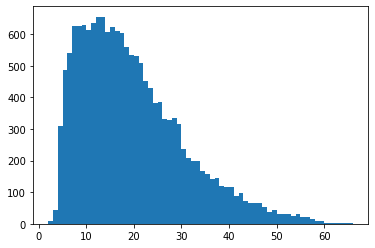

In [ ]:
lengths = [len(t.split(" ")) for t in tweets]
plt.hist(lengths, bins = len(set(lengths)))

(array([  1.,   3.,   0.,   5.,   3.,   8.,  10.,  17.,  12.,  24.,  33.,
         39.,  49.,  69.,  62.,  73.,  87.,  96.,  94.,  90., 122., 116.,
        117., 125., 127., 113.,  99., 124., 115., 128., 140., 108., 126.,
        129., 108., 124., 141., 121., 130., 134., 134., 136., 153., 120.,
        145., 100., 120., 108., 139., 114., 106., 113., 137., 140., 132.,
        118., 122., 133., 130., 124., 110., 153., 119., 155., 116., 131.,
        141., 139., 116., 111., 104., 117., 140., 117., 115., 118., 107.,
        114., 122., 139., 106., 113., 128.,  94., 123., 107., 115., 114.,
        103.,  99.,  90., 101.,  88.,  94.,  96., 103.,  87., 109., 102.,
         91.,  98.,  92., 107.,  97.,  82.,  89., 106.,  78.,  72.,  85.,
         82.,  82.,  64.,  59.,  86.,  87.,  66.,  62.,  69.,  68.,  55.,
         82.,  82.,  74.,  58.,  69.,  74.,  67.,  74.,  63.,  69.,  73.,
         61.,  62.,  65.,  61.,  50.,  72.,  66.,  47.,  50.,  49.,  49.,
         46.,  53.,  43.,  34.,  33., 

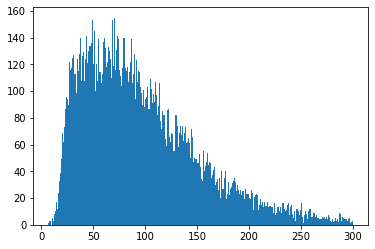

In [ ]:
###for letter
#lengths = [len(t) for t in tweets]
#plt.hist(lengths, bins = len(set(lengths)))

In [ ]:


from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
maxlen = 70
def get_sequences(tokenizer, tweets):
  sequences = tokenizer.texts_to_sequences(tweets)
  padded = pad_sequences(sequences, truncating='post', padding='post', maxlen = maxlen)
  return padded

In [ ]:
padded_train_seq = get_sequences(tokenizer, tweets)

In [ ]:
padded_train_seq[1], tweets[1]

(array([   2,   40,  101,   60,    8,   15,  494,    5,   15, 3496,  553,
          32,   60,   61,  128,  148,   76, 1480,    4,   22, 1255,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0], dtype=int32),
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake')

## Task 6: Preparing the Labels

1. Creating classes to index and index to classes dictionaries
2. Converting text labels to numeric labels

In [ ]:
classes = { 0 : 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'}

In [ ]:
classes[0]

'sadness'

In [ ]:
classes

{0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'}

In [ ]:
list(classes[i] for i in range(5))

['sadness', 'joy', 'love', 'anger', 'fear']

(array([4666.,    0., 5362.,    0., 1304.,    0., 2159.,    0., 1937.,
           0.,  572.]),
 array([0.        , 0.45454545, 0.90909091, 1.36363636, 1.81818182,
        2.27272727, 2.72727273, 3.18181818, 3.63636364, 4.09090909,
        4.54545455, 5.        ]),
 <a list of 11 Patch objects>)

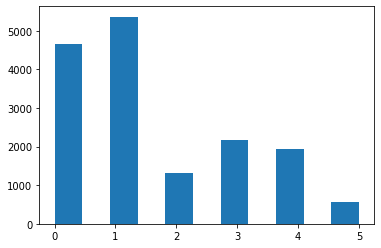

In [ ]:
plt.hist(labels, bins=11)

In [ ]:
#class_to_idx = dict((c,i) for i, c in enumarate(classes))
idx_to_class = dict((v,k) for k,v in classes.items())

In [ ]:
idx_to_class

{'sadness': 0, 'joy': 1, 'love': 2, 'anger': 3, 'fear': 4, 'surprise': 5}

In [ ]:
#names_to_ids = lambda labels: np.array([classes.get(x) for x in labels]) # no_need, already numeric

In [ ]:
labels[0]

0

In [ ]:
train_labels = np.array(labels)

## Task 7: Creating the Model

1. Creating the model
2. Compiling the model

In [ ]:
from keras.layers.attention.multi_head_attention import activation
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 16, input_length= maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(70, return_sequences= True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences= True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
    tf.keras.layers.Dense(6, activation= 'softmax')
])

model.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer = 'adam',
    metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 70, 16)            160000    
                                                                 
 bidirectional (Bidirectiona  (None, 70, 140)          48720     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 70, 40)           25760     
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 40)               9760      
 nal)                                                            
                                                                 
 dense (Dense)               (None, 6)                 246       
                                                        

## Task 8: Training the Model

1. Preparing a validation set
2. Training the model

In [ ]:

def prepare_data(data, tokenizer): 
  tweets, labels = get_tweet(data)
  labels = np.array(labels)
  seq = get_sequences(tokenizer, tweets)

  return tweets, labels, seq


In [ ]:
val_tweets, val_labels, val_seq = prepare_data(val, tokenizer)

val_tweets[0], val_labels[0]

('im feeling quite sad and sorry for myself but ill snap out of it soon', 0)

In [ ]:
h = model.fit(
    padded_train_seq, train_labels,
    validation_data = (val_seq,val_labels),
    batch_size= 64,
    epochs = 20,
    validation_batch_size= 16,
    callbacks= [
        tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience= 5)
    ]
)

Epoch 1/20
250/250 [==============================] - 10s 40ms/step - loss: 0.4037 - accuracy: 0.8629 - val_loss: 0.5232 - val_accuracy: 0.8340
Epoch 2/20
250/250 [==============================] - 8s 32ms/step - loss: 0.2813 - accuracy: 0.9120 - val_loss: 0.4890 - val_accuracy: 0.8425
Epoch 3/20
250/250 [==============================] - 7s 29ms/step - loss: 0.2104 - accuracy: 0.9369 - val_loss: 0.4528 - val_accuracy: 0.8645
Epoch 4/20
250/250 [==============================] - 8s 30ms/step - loss: 0.1675 - accuracy: 0.9480 - val_loss: 0.4565 - val_accuracy: 0.8655
Epoch 5/20
250/250 [==============================] - 7s 27ms/step - loss: 0.1411 - accuracy: 0.9561 - val_loss: 0.4055 - val_accuracy: 0.8930
Epoch 6/20
250/250 [==============================] - 7s 29ms/step - loss: 0.1186 - accuracy: 0.9629 - val_loss: 0.4188 - val_accuracy: 0.8815
Epoch 7/20
250/250 [==============================] - 6s 25ms/step - loss: 0.1793 - accuracy: 0.9460 - val_loss: 0.4158 - val_accuracy: 0.888

## Task 9: Evaluating the Model

1. Visualizing training history
2. Prepraring a test set
3. A look at individual predictions on the test set
4. A look at all predictions on the test set

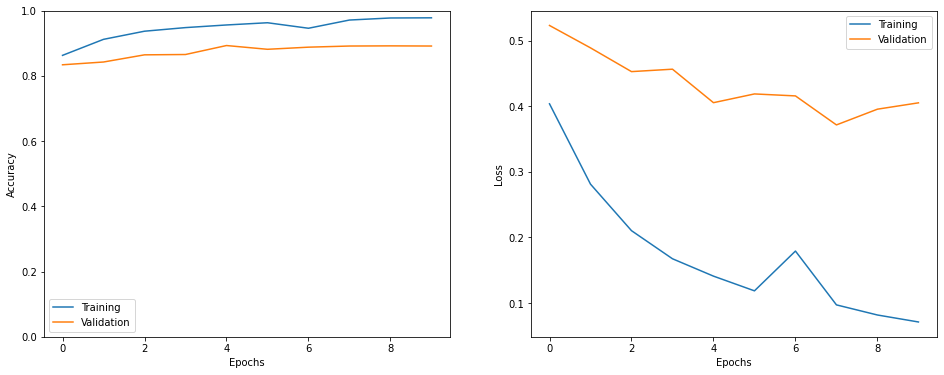

In [ ]:
show_history(h)

In [ ]:
test_tweets, test_labels, test_seq = prepare_data(test, tokenizer)

test_tweets[0], classes[test_labels[0]]

('im feeling rather rotten so im not very ambitious right now', 'sadness')

In [ ]:
_ = model.evaluate(test_seq, test_labels)

63/63 [==============================] - 3s 11ms/step - loss: 0.3740 - accuracy: 0.8990


In [ ]:
i = random.randint(0, len(test_labels)-1)

print("Sentence: ", test_tweets[i])
print("Real Emotion : ", classes[test_labels[i]])

p = model.predict(np.expand_dims(test_seq[i], axis=0))[0]

pred_class = classes[np.argmax(p).astype('uint8')]

print(" Predicted Emotion : ", pred_class)

Sentence:  i feel a little glamorous i wet the brush
Real Emotion :  joy
1/1 [==============================] - 0s 27ms/step
 Predicted Emotion :  joy


In [ ]:
preds = np.argmax(model.predict(test_seq), axis=-1)

63/63 [==============================] - 1s 10ms/step


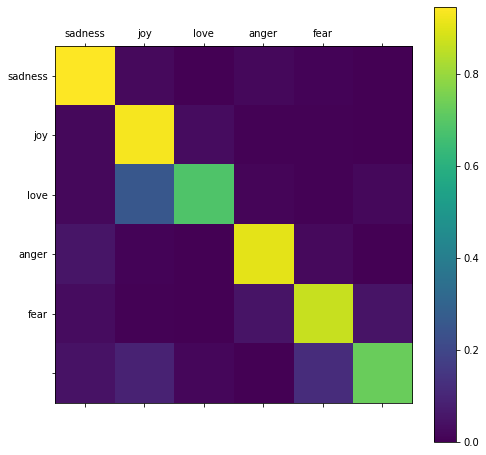

In [ ]:
show_confusion_matrix(test_labels, preds, list(classes[i] for i in range(5)))